In [1]:
from skimage import segmentation, filters, measure
from skimage.feature import canny
from scipy import ndimage as ndi
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os

plt.set_cmap(plt.gray())

%matplotlib inline

(array([[32, 32, 32, ..., 16, 12, 12],
        [34, 34, 34, ..., 16, 12, 12],
        [32, 32, 34, ..., 16, 12, 12],
        ..., 
        [12, 10, 12, ..., 15, 14, 11],
        [15, 11, 14, ..., 15, 14, 11],
        [15, 12, 10, ..., 16, 14, 10]], dtype=uint8), (48, 146))

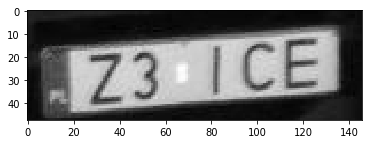

In [2]:
# fp = '../data/Z3_ICE_plate_0.jpg'
# fp = '../data/images_plates/D1_JZO14_plate_0.jpg'
# fp = '../data/images_plates/D1_MAKAR_plate_0.jpg'
# fp = '../data/images_plates/W0_IPECO_plate_0.jpg'

fn = 'Z3_ICE_plate_0.jpg'
# fn = 'W0_IPECO_plate_0.jpg'

DIR = '../data/images_plates/'
fp = os.path.join(DIR, fn)
img = s = cv2.imread(fp, 0)

# sobel, threshold, sobel, watershed

plt.imshow(img)
img, img.shape

(array([[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ..., 
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]], dtype=bool),
 (48, 146),
 dtype('bool'))

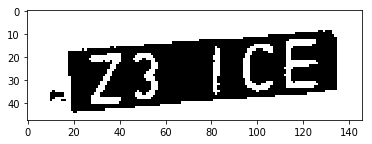

In [3]:
from skimage.filters import sobel

coins = img < filters.threshold_minimum(img)

plt.imshow(coins)
coins, coins.shape, coins.dtype

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int8), (48, 146), dtype('int8'))

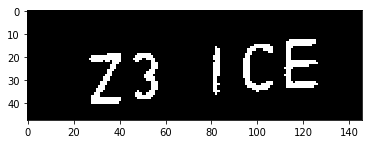

In [4]:
labeled_coins, a = ndi.label(coins)
labeled_coins = (labeled_coins > 1).astype(np.int8)
plt.imshow(labeled_coins)
labeled_coins, labeled_coins.shape, labeled_coins.dtype

In [5]:
c = measure.find_contours(labeled_coins, .1)

In [6]:
l = []
for i, v in enumerate(c):
    xs, ys = zip(*[i for i in v])
    x = int(min(xs))
    y = int(min(ys))
    w = int(max(xs) - x + 2)
    h = int(max(ys) - y + 2)
    if w < 15:
        continue
    l.append((y, x, h, w))

l = sorted(l)
l

[(26, 18, 16, 24),
 (45, 18, 13, 22),
 (80, 15, 5, 23),
 (93, 14, 15, 23),
 (111, 12, 17, 23)]

In [7]:
ll = [img[x:x+w, y:y+h] for y,x,h,w in l]

ll = [i for i in ll if i[0,0] > 127]

In [12]:
plate = fn.replace('_', '').split('plate')[0]

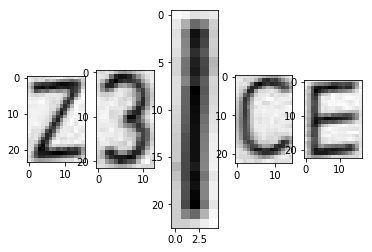

In [14]:
d = [(i.shape[0] * i.shape[1], i) for i in ll]
len(d)
fig, axs = plt.subplots(1, len(ll))
for i, (v, letter) in enumerate(zip(ll, plate)):
    axs[i].imshow(v)
#     plt.imsave(f'd/{letter}.jpg', v)

In [9]:
[i[0] for i in sorted(d, key=lambda x: x[0])]
[i[0] for i in d]

[384, 286, 115, 345, 391]

In [15]:
os.listdir(DIR)

['T7_PONIO_plate_0.jpg',
 'W6_PRP20_plate_1.jpg',
 'P0_KUFI_plate_0.jpg',
 'C0_PTAKU_plate_0.jpg',
 'D2_CADDY_plate_0.jpg',
 'P2_DACHY_plate_1.jpg',
 'W0_MADEX_plate_0.jpg',
 'P8_SKIRA_plate_0.jpg',
 'G5_SKARP_plate_0.jpg',
 'K8_ANGEL_plate_0.jpg',
 'W0_GULIA_plate_3.jpg',
 'Z2_KULKI_plate_1.jpg',
 'P0_DABEW_plate_1.jpg',
 'P1_AGNES_plate_0.jpg',
 'C0_DEMO_plate_4.jpg',
 'E0_KOLO_plate_1.jpg',
 'D1_PRP68_plate_4.jpg',
 'C0_DOMEL_plate_1.jpg',
 'L0_EDMAR_plate_0.jpg',
 'R1_HALKO_plate_1.jpg',
 'R0_AGA_plate_0.jpg',
 'N2_MOTOR_plate_0.jpg',
 'D7_RPF77_plate_0.jpg',
 'K1_LENA_plate_0.jpg',
 'K1_PAWEL_plate_0.jpg',
 'D1_MAMA_plate_0.jpg',
 'T0_EDAM_plate_0.jpg',
 'E6_PJVE_plate_0.jpg',
 'P0_NGS_plate_0.jpg',
 'W0_VST_plate_2.jpg',
 'E1_IGDP3_plate_1.jpg',
 'Z0_TOTUS_plate_0.jpg',
 'Z0_GMK_plate_0.jpg',
 'S8_DRAKE_plate_0.jpg',
 'W3_OOO_plate_0.jpg',
 'S1_ACN_plate_0.jpg',
 'P0_ATUT_plate_6.jpg',
 'E0_CAR27_plate_0.jpg',
 'W3_BOSS_plate_1.jpg',
 'W0_ABC21_plate_4.jpg',
 'P0_IKS_plate_1.jpg'